<a href="https://colab.research.google.com/github/XPONOKPATWP/nlp-project/blob/main/final_nlp_project_aivc24006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell 0: Installing missing module emoji

In [ ]:
pip install emoji

# Cell 1: Imports and NLTK Downloads


εισάγετε μια ποικιλία βιβλιοθηκών της Python που χρησιμοποιούνται ευρέως στην ανάλυση δεδομένων, την επεξεργασία φυσικής γλώσσας (NLP), την μηχανική μάθηση και την βαθιά μάθηση. Συγκεκριμένα, περιλαμβάνει βιβλιοθήκες για:

* Χειρισμό και ανάλυση δεδομένων: pandas
* Καθαρισμό και προεπεξεργασία κειμένου: re, nltk, emoji
* Εξαγωγή χαρακτηριστικών και δημιουργία μοντέλων μηχανικής μάθησης: scikit-learn (με αλγορίθμους όπως Logistic Regression, LinearSVC, MultinomialNB και μετρικές αξιολόγησης)
* Επεξεργασία κειμένου με βαθιά μάθηση: TensorFlow και Keras (με εργαλεία όπως Tokenizer, pad_sequences και διάφορα νευρωνικά δίκτυα, π.χ. LSTM, Conv1D)
* Οπτικοποίηση: matplotlib
* Επιπλέον, γίνεται λήψη απαραίτητων πόρων από το NLTK (π.χ. λίστες stopwords, wordnet).

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd

# Import libraries for text cleaning and preprocessing
import re
import nltk
import emoji

# Import specific functionalities from nltk
from nltk.tokenize import word_tokenize  # Tokenize text into words
from nltk.corpus import stopwords  # Load stopwords for removal
from nltk.stem import WordNetLemmatizer  # Lemmatize words for better representation

# Import libraries for feature extraction and model building (scikit-learn)
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorization
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import LinearSVC  # Linear Support Vector Machine classifier
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes classifier
from sklearn.metrics import (  # Metrics for model evaluation
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# Import libraries for deep learning text processing (TensorFlow & Keras)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenize text into integer sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pad sequences to equal length
from tensorflow.keras.layers import (  # Layers for building the neural network
    Embedding,  # Embed tokens as dense vectors
    LSTM,  # Long Short-Term Memory layer for capturing long-range dependencies
    Dense,  # Densely connected layers for classification
    Dropout,  # Dropout layer for regularization to prevent overfitting
    Input,  # Input layer to define the model input
    GlobalAveragePooling1D,  # Global Average Pooling for summarizing sequence features
    Conv1D,  # Convolutional 1D layer for feature extraction
    add,  # Add operation for combining features
)
from tensorflow.keras.models import Model  # Build the deep learning model
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping to prevent overfitting

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Download necessary resources from NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Αυτές οι γραμμές δείχνουν ότι το NLTK έλεγξε και βρήκε τα απαραίτητα πακέτα (stopwords, wordnet, omw-1.4, punkt) ήδη εγκατεστημένα και ενημερωμένα. Το "True" επιβεβαιώνει την επιτυχή ολοκλήρωση της εντολής. Με λίγα λόγια, το NLTK είναι έτοιμο για χρήση.

# Cell 2: Data Loading

Ο κώδικας προσπαθεί να διαβάσει το αρχείο "IMDB Dataset.csv" με την pandas. Αν το αρχείο δεν βρεθεί, εμφανίζει μήνυμα σφάλματος και τερματίζει το πρόγραμμα.

In [ ]:
try:
    # Attempt to read the CSV file into a Pandas DataFrame
    df = pd.read_csv("IMDB Dataset.csv")
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: 'IMDB Dataset.csv' not found. Please ensure the file is in the correct directory or provide the correct path.")
    # Exit the program with a non-zero exit code to indicate an error
    exit()

Εφόσον δεν προέκυψε σφάλμα, η ανάγνωση του αρχείου "IMDB Dataset.csv" ήταν επιτυχής και τα δεδομένα είναι έτοιμα για χρήση στη μεταβλητή df.

# Cell 3: Text Preprocessing

Ο κώδικας αυτός ορίζει μια συνάρτηση preprocess_text για καθαρισμό κειμένου (κριτικές ταινιών) και την εφαρμόζει σε ένα DataFrame. Επίσης, μετατρέπει τις ετικέτες συναισθήματος σε αριθμητικές τιμές.

* Δημιουργεί λεξικά για αντικατάσταση αργκό (movie_jargon) και επέκταση συντομογραφιών (contractions).
* Η preprocess_text αφαιρεί HTML, URLs, μη-αλφαριθμητικούς χαρακτήρες, μετατρέπει σε πεζά, αντικαθιστά emojis, επεκτείνει συντομογραφίες, αντικαθιστά αργκό, αφαιρεί stopwords, διαχειρίζεται την άρνηση (προσθέτοντας "NOT_"), κάνει λημματοποίηση.
* Εφαρμόζει την preprocess_text στη στήλη 'review' του DataFrame df.
* Μετατρέπει τις ετικέτες 'positive'/'negative' σε 1/0 στη μεταβλητή y.

In [ ]:
# Define a dictionary for movie jargon replacement
movie_jargon = {
    "oscar-worthy": "excellent",
    "box office hit": "successful movie",
    "cliffhanger": "abrupt ending",
    "prequel": "previous movie",
    "sequel": "following movie",
    "remake": "new version",
    "indie film": "independent film",
    "cgi": "computer generated imagery",
    "vfx": "visual effects",
    "rotfl": "rolling on the floor laughing",
    "lol": "laughing out loud",
    "imo": "in my opinion",
    "tbh": "to be honest",
    "f/x": "effects",
    "sfx": "sound effects",
    "blockbuster": "very successful movie",
}

# Define a dictionary for contraction expansion
contractions = {
    "can't": "cannot",
    "won't": "will not",
    "it's": "it is",
    "don't": "do not",
    "didn't": "did not",
    "i'm": "i am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "that's": "that is",
    "there's": "there is",
    "let's": "let us"
}

# Define the text preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Replace emojis with spaces
    text = emoji.replace_emoji(text, replace=" ")
    # Split the text into words
    words = text.split()

    # Expand contractions
    words = [contractions.get(word, word) for word in words]
    # Replace movie jargon
    words = [movie_jargon.get(word, word) for word in words]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Handle negation by adding "NOT_" prefix to words following negation words
    negation_words = {'no', 'not', 'never', 'none', 'nobody', 'nowhere', 'neither', 'nor'}
    negated = False
    negated_words = []
    for i, word in enumerate(words):
        if word in negation_words:
            negated = True
            continue  # Skip the negation word itself
        if negated:
            negated_words.append("NOT_" + word)  # Append NOT_ to the word
            negated = False  # Reset the negated flag
        else:
            negated_words.append(word)
    words = negated_words

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the processed words back into a string
    return " ".join(words)

# Apply the preprocessing function to the 'review' column of the DataFrame
df['review'] = df['review'].apply(preprocess_text)

# Map sentiment labels to numerical values (positive: 1, negative: 0)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

Αυτός ο κώδικας δεν παράγει ορατά αποτελέσματα στην οθόνη ή σε αρχείο. Αντίθετα, εκτελεί μια σειρά μετασχηματισμών στα δεδομένα κειμένου (καθαρισμός, λημματοποίηση, κ.λπ.) προετοιμάζοντάς τα για την εκπαίδευση ενός μοντέλου μηχανικής μάθησης ή άλλες εργασίες ανάλυσης.

# Cell 4: Data Preparation for Classic ML Models (TF-IDF)

Ο κώδικας μετατρέπει τις κριτικές σε αριθμητικές αναπαραστάσεις TF-IDF και τις χωρίζει σε σύνολα εκπαίδευσης και δοκιμής για μοντέλο μηχανικής μάθησης. Πιο συγκεκριμένα:

* tfidf_vectorizer = TfidfVectorizer(max_features=5000): Δημιουργεί αντικείμενο TF-IDF, περιορίζοντας τα χαρακτηριστικά στις 5000 πιο συχνές λέξεις.

* X_tfidf = tfidf_vectorizer.fit_transform(df['review']): Μετατρέπει τις κριτικές σε μήτρα TF-IDF.

* X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42): Χωρίζει τα δεδομένα σε εκπαίδευσης (80%) και δοκιμής (20%), με σταθερό σπόρο για αναπαραγωγιμότητα.

In [ ]:
# Initialize a TF-IDF vectorizer with a maximum of 5000 features.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the TF-IDF vectorizer on the 'review' column of the DataFrame (df) and transform the text data into a TF-IDF weighted matrix.
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

# Split the TF-IDF matrix (X_tfidf) and the target variable (y) into training and testing sets.
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Αυτός ο κώδικας εκτελεί προετοιμασία δεδομένων για μηχανική μάθηση και δεν παράγει άμεσα ορατά αποτελέσματα. Μετατρέπει τις κριτικές σε αριθμητικές αναπαραστάσεις TF-IDF και τις χωρίζει σε σύνολα εκπαίδευσης και δοκιμής, προετοιμάζοντας τα δεδομένα για την εκπαίδευση ενός μοντέλου ταξινόμησης.

# Cell 5: Data Preparation for Deep Learning Models (Tokenization and Padding)

Ο κώδικας προετοιμάζει τις κριτικές για χρήση σε μοντέλο βαθιάς μάθησης, μετατρέποντάς τες σε αριθμητικές ακολουθίες σταθερού μήκους. Δεν παράγει άμεσο ορατό αποτέλεσμα, αλλά μετασχηματίζει τα δεδομένα. Πιο συγκεκριμένα:

* MAX_VOCAB_SIZE = 10000, MAX_SEQUENCE_LENGTH = 200: Ορίζουν το μέγιστο μέγεθος λεξιλογίου και μήκος ακολουθιών.
* tokenizer = Tokenizer(...): Δημιουργεί tokenizer (με <UNK> για άγνωστες λέξεις).
* tokenizer.fit_on_texts(...): Δημιουργεί το λεξιλόγιο.
* sequences = tokenizer.texts_to_sequences(...): Μετατρέπει τις κριτικές σε ακολουθίες αριθμών.
* padded_sequences = pad_sequences(...): Κάνει padding τις ακολουθίες σε σταθερό μήκος.
* X_train_seq, X_test_seq, y_train, y_test = train_test_split(...): Χωρίζει τα δεδομένα σε εκπαίδευσης/δοκιμής.

In [ ]:
# Define the maximum vocabulary size and sequence length.
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200

# Initialize a tokenizer object.
# Tokenizer is a class from Keras that converts text into sequences of integers.
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<UNK>")

# Fit the tokenizer on the 'review' column of the DataFrame (df).
# This builds the vocabulary based on the text data.
tokenizer.fit_on_texts(df['review'])

# Convert the text data into sequences of integers.
sequences = tokenizer.texts_to_sequences(df['review'])

# Pad the sequences to a fixed length.
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, truncating='post')

# Split the padded sequences and the target variable (y) into training and testing sets.
X_train_seq, X_test_seq, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

Σκοπός αυτού του κώδικα είναι η προετοιμασία των δεδομένων για την εκπαίδευση ενός μοντέλου βαθιάς μάθησης, επομένως δεν παράγει άμεσα ορατά αποτελέσματα.

# Cell 6: Exploratory Data Analysis (EDA)

Ο κώδικας αυτός πραγματοποιεί Διερευνητική Ανάλυση Δεδομένων (EDA) στις κριτικές ταινιών, εξετάζοντας την κατανομή των συναισθημάτων, το μήκος των κριτικών και παρουσιάζοντας τυχαία δείγματα.

Πιο συγκεκριμένα:

* Class Distribution (Κατανομή Κλάσεων): Εξετάζει την κατανομή των θετικών και αρνητικών κριτικών (πόσες υπάρχουν από κάθε κατηγορία) και την εμφανίζει σε ραβδόγραμμα.

* Text Length Analysis (Ανάλυση Μήκους Κειμένου): Αναλύει το μήκος των κριτικών (σε αριθμό χαρακτήρων), υπολογίζει στατιστικά (μέσος όρος, τυπική απόκλιση κλπ.) και εμφανίζει την κατανομή τους σε ιστόγραμμα.

* Sample Reviews (Δείγματα Κριτικών): Εμφανίζει τρία τυχαία επιλεγμένα δείγματα κριτικών, μαζί με το αντίστοιχο συναίσθημα και το συνολικό τους μήκος.
Έτσι, ο κώδικας μας δίνει μια πρώτη εικόνα για τα δεδομένα μας, χωρίς να εκπαιδεύει κάποιο μοντέλο. Απλά μας βοηθά να κατανοήσουμε καλύτερα τα χαρακτηριστικά τους.


--- Class Distribution ---
Full Data:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


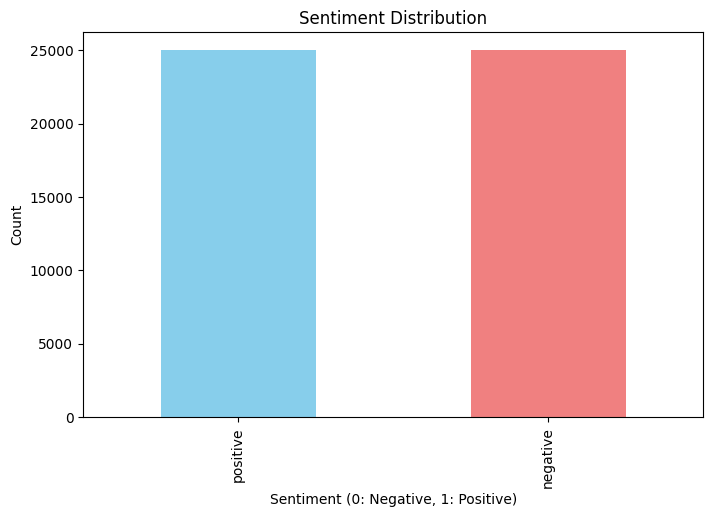


--- Text Length Analysis ---
Full Data:
count    50000.000000
mean       819.827420
std        632.284159
min         17.000000
25%        429.000000
50%        603.000000
75%        999.000000
max       9177.000000
Name: review_length, dtype: float64


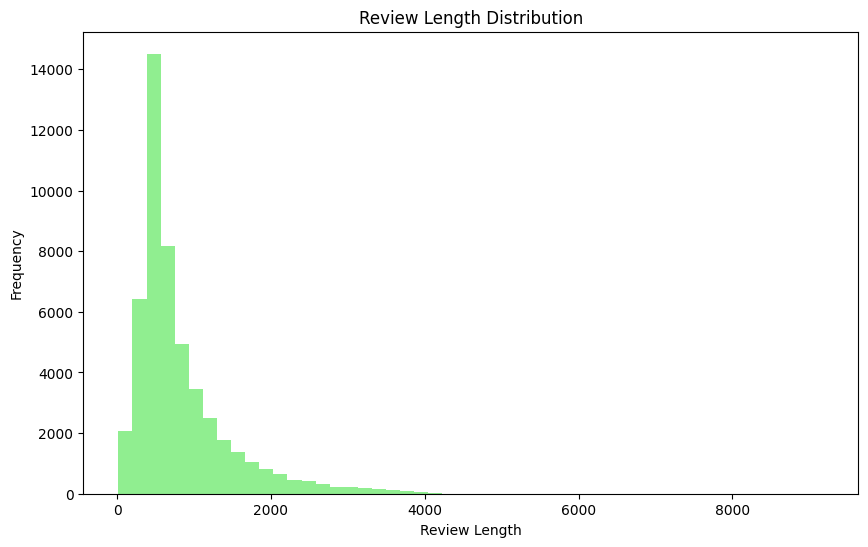


--- Sample Reviews ---

Sample 1:
Sample sentiment: negative (0: Negative, 1: Positive)
Sample review (first 200 characters):
finished reading forsyths novel icon thought one depth detailed pageturning book ever read definitely top acquired dvd version book starring mr swayze ok let first point fit decent adaptation novel ho...
Full Review Length: 715 characters

Sample 2:
Sample sentiment: positive (0: Negative, 1: Positive)
Sample review (first 200 characters):
one moving movie ever seen year old watched first time whenever tv eye glued acting plot amazing seems true reality touch many controversial topic recommend movie anyone interested good drama...
Full Review Length: 191 characters

Sample 3:
Sample sentiment: negative (0: Negative, 1: Positive)
Sample review (first 200 characters):
oh god must seen twelve dont ask may young wasnt stupid anyone could see bad movie nasty gross unscary silly ive seen impressive effect disneyland ive seen better performance school play ive seen co

In [ ]:
# 1. Class Distribution
print("\n--- Class Distribution ---")
print("Full Data:")
print(df['sentiment'].value_counts())

plt.figure(figsize=(8, 5))
df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')  # More informative label
plt.ylabel('Count')
plt.show()

# 2. Text Length
print("\n--- Text Length Analysis ---")
df['review_length'] = df['review'].apply(len)

print("Full Data:")
print(df['review_length'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='lightgreen')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# 3. Sample Review
print("\n--- Sample Reviews ---")

for i in range(3): # Show 3 samples
    sample_index = df.sample(1).index[0]
    sample_review = df.loc[sample_index, 'review']
    sample_sentiment = df.loc[sample_index, 'sentiment']
    print(f"\nSample {i+1}:")
    print(f"Sample sentiment: {sample_sentiment} (0: Negative, 1: Positive)") # Added sentiment meaning
    print(f"Sample review (first 200 characters):\n{sample_review[:200]}...")
    print(f"Full Review Length: {len(sample_review)} characters")

Τα αποτελέσματα δείχνουν:

* Κατανομή Κλάσεων: Ισορροπημένο dataset (25.000 θετικές/αρνητικές κριτικές).
* Ανάλυση Μήκους: Μεγάλη διακύμανση στο μήκος των κριτικών (17-9177 χαρακτήρες, μέσος όρος 820), άρα χρειάζεται προεπεξεργασία και πιθανώς padding/truncating.
* Δείγματα: Επιβεβαιώνουν τη διακύμανση στο μήκος και την ανάγκη για προεπεξεργασία λόγω "θορύβου" (ορθογραφικά, συντομογραφίες).

# Cell 7: Classic ML Models Training and Evaluation

Ο κώδικας εκπαιδεύει και αξιολογεί τρία κλασικά μοντέλα μηχανικής μάθησης για ανάλυση συναισθήματος: Logistic Regression, Linear SVM και Naive Bayes. Συγκεκριμένα:

* Δημιουργεί ένα λεξικό classic_models όπου αποθηκεύονται τα τρία μοντέλα.
*Για κάθε μοντέλο:
  * Το εκπαιδεύει στα δεδομένα εκπαίδευσης.
  * Κάνει προβλέψεις στα δεδομένα δοκιμής.
  * Εκτυπώνει ενα classification report με μετρικές όπως accuracy,precision, recall, F1-score και confusion matrix.

In [ ]:
# Define a dictionary to store classic machine learning models
classic_models = {
    # Logistic Regression model with maximum iterations set to 1000
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # Linear Support Vector Machine model
    "Linear SVM": LinearSVC(),
    # Multinomial Naive Bayes model
    "Naive Bayes": MultinomialNB()
}

# Loop through each model in the dictionary
for name, model in classic_models.items():
    print(f"Training {name}...")  # Print training message for the current model
    model.fit(X_train_tfidf, y_train)  # Train the model on training data
    y_pred = model.predict(X_test_tfidf)  # Make predictions on test data

    print(f"Evaluation for {name}:")  # Print evaluation header for the current model
    print(classification_report(y_test, y_pred))  # Print classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))  # Print accuracy score
    print("Precision:", precision_score(y_test, y_pred))  # Print precision score
    print("Recall:", recall_score(y_test, y_pred))  # Print recall score
    print("F1 Score:", f1_score(y_test, y_pred))  # Print F1 score
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))  # Print confusion matrix

    print("-" * 30)  # Print separator for clarity

Training Logistic Regression...
Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8852
Precision: 0.8757967935097547
Recall: 0.8997817027187934
F1 Score: 0.8876272513703993
Confusion Matrix:
[[4318  643]
 [ 505 4534]]
------------------------------
Training Linear SVM...
Evaluation for Linear SVM:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.88
Precision: 0.8746828030450907
Reca

Τα αποτελέσματα δείχνουν:

* Logistic Regression: Καλύτερη συνολική απόδοση (accuracy 88.52%, F1-score 88.76%, precision/recall ~88-90%).
* Linear SVM: Παρόμοια απόδοση με Logistic Regression (accuracy 88%, F1-score 88.19%).
* Naive Bayes: Χαμηλότερη απόδοση (accuracy 84.93%, F1-score 85.11%).

Συνοπτικά: Logistic Regression και Linear SVM αποδίδουν καλύτερα από Naive Bayes στην ταξινόμηση συναισθήματος, με την Logistic Regression να έχει ένα μικρό προβάδισμα.

# Cell 8: LSTM Model Definition and Training

Ο κώδικας δημιουργεί και εκπαιδεύει ένα μοντέλο LSTM για ανάλυση συναισθήματος σε κείμενο. Συνοπτικά:

* embedding_dim = 100: Ορίζει τη διάσταση των word embeddings (διανυσμάτων λέξεων) σε 100.

* input_layer = Input(...): Ορίζει το επίπεδο εισόδου για ακολουθίες μήκους MAX_SEQUENCE_LENGTH.

* embedding_layer = Embedding(...): Μετατρέπει τις λέξεις σε διανύσματα 100 διαστάσεων (word embeddings). Το MAX_VOCAB_SIZE ορίζει το μέγεθος του λεξιλογίου.

* lstm_layer = LSTM(64)(...): Επίπεδο LSTM με 64 units για επεξεργασία ακολουθιών.

* dropout_layer = Dropout(0.5)(...): Εφαρμόζει Dropout (50%) για αποφυγή overfitting.

* output_layer = Dense(1, activation='sigmoid'): Επίπεδο εξόδου για δυαδική ταξινόμηση (sigmoid ενεργοποίηση).

* lstm_model = Model(...): Δημιουργεί το μοντέλο συνδυάζοντας τα επίπεδα.

* lstm_model.compile(...): "Μεταγλωττίζει" το μοντέλο (ορίζει optimizer, loss, metrics).

* lstm_model.summary(): Εκτυπώνει μια περίληψη της αρχιτεκτονικής του μοντέλου.

* early_stopping = EarlyStopping(...): Ορίζει early stopping για να σταματήσει η εκπαίδευση αν δεν βελτιώνεται η απώλεια στο validation set.

* lstm_model.fit(...): Εκπαιδεύει το μοντέλο με τα δεδομένα εκπαίδευσης, καθορίζοντας epochs, batch size, validation split και χρησιμοποιώντας το early stopping.

In [ ]:
# Define embedding dimension (size of word vectors)
embedding_dim = 100

# Define the input layer for sequences of text
input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Embedding layer to convert words to vectors
embedding_layer = Embedding(MAX_VOCAB_SIZE, embedding_dim)(input_layer)
# - MAX_VOCAB_SIZE: Number of unique words in the vocabulary
# - embedding_dim: Size of the word vectors

# Long Short-Term Memory (LSTM) layer for processing sequences
lstm_layer = LSTM(64)(embedding_layer)
# - 64: Number of units in the LSTM layer (controls complexity)

# Dropout layer to prevent overfitting
dropout_layer = Dropout(0.5)(lstm_layer)
# - 0.5: Probability of dropping out units during training

# Output layer with sigmoid activation for binary classification
output_layer = Dense(1, activation='sigmoid')(dropout_layer)
# - 1: Single output unit for binary classification
# - activation='sigmoid': Maps output between 0 and 1 for probability

# Define the model with input and output layers
lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with optimizer, loss function, and metrics
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
lstm_model.summary()

# Early stopping callback to stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model on training data with validation split and early stopping
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 200, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 147s 255ms/step - accuracy: 0.7290 - loss: 0.5220 - val_accuracy: 0.8755 - val_loss: 0.2974
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 140s 248ms/step - accuracy: 0.9081 - loss: 0.2459 - val_accuracy: 0.8725 - val_loss: 0.3207
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 141s 246ms/step - accuracy: 0.9307 - loss: 0.1874 - val_accuracy: 0.8673 - val_loss: 0.3359
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 142s 247ms/step - accuracy: 0.9467 - loss: 0.1487 - val_accuracy: 0.8565 - val_loss: 0.3669


Η εκπαίδευση του LSTM μοντέλου δείχνει σημάδια υπερπροσαρμογής, με το early stopping να παίζει καθοριστικό ρόλο. Πιο συγκεκριμένα:

* Υπερπροσαρμογή: Η απόδοση στα δεδομένα εκπαίδευσης (training accuracy) βελτιώνεται συνεχώς, ενώ η απόδοση στα δεδομένα επικύρωσης (validation accuracy) σταθεροποιείται ή και χειροτερεύει μετά από λίγες εποχές. Αυτή η διαφορά στην απόδοση υποδεικνύει ότι το μοντέλο μαθαίνει πολύ καλά τα δεδομένα εκπαίδευσης, αλλά δεν γενικεύει καλά σε άγνωστα δεδομένα.

* Early Stopping: Το early stopping σταμάτησε την εκπαίδευση μετά από 5 εποχές, παρόλο που είχαμε ορίσει epochs=10. Αυτό συνέβη επειδή η απώλεια στο validation set (val_loss) σταμάτησε να μειώνεται για 3 συνεχόμενες εποχές (patience=3).

* Σκοπός του Early Stopping: Το early stopping αποτρέπει την υπερβολική εκπαίδευση, επιλέγοντας τα βάρη του μοντέλου που είχαν την καλύτερη απόδοση στο validation set. Έτσι, επιλέγουμε ένα μοντέλο που γενικεύει καλύτερα σε νέα δεδομένα.

* Αποτέλεσμα: Το early stopping ήταν αποτελεσματικό, σταματώντας την εκπαίδευση πριν το μοντέλο "αποστηθίσει" τα δεδομένα εκπαίδευσης. Η τελική απόδοση του μοντέλου είναι πιθανότατα κοντά στην βέλτιστη που μπορεί να επιτευχθεί με την συγκεκριμένη αρχιτεκτονική.

# Cell 9: LSTM Model Evaluation

Ο κώδικας αξιολογεί ένα εκπαιδευμένο μοντέλο LSTM, εκτυπώνοντας μετρικές απόδοσης. Συνοπτικά:

* y_pred_probs = lstm_model.predict(X_test_seq): Προβλέπει πιθανότητες για τα δεδομένα δοκιμής.
* y_pred = (y_pred_probs > 0.5).astype(int): Μετατρέπει τις πιθανότητες σε κατηγορίες (0 ή 1).
* print("Evaluation for LSTM:"): Εκτυπώνει επικεφαλίδα.
* print(classification_report(...)): Εκτυπώνει αναφορά ταξινόμησης.
* print("Accuracy:", accuracy_score(...)): Εκτυπώνει ακρίβεια.
* print("Precision:", precision_score(...)): Εκτυπώνει precision.
* print("Recall:", recall_score(...)): Εκτυπώνει recall.
* print("F1 Score:", f1_score(...)): Εκτυπώνει F1-score.
* print("Confusion Matrix:"): Εκτυπώνει επικεφαλίδα για τον πίνακα σύγχυσης.
* print(confusion_matrix(...)): Εκτυπώνει πίνακα σύγχυσης.
* print("-" * 30): Εκτυπώνει διαχωριστική γραμμή.

In [ ]:
y_pred_probs = lstm_model.predict(X_test_seq)
# Predict probabilities for the test set using the trained LSTM model.
# y_pred_probs will contain the probability of each sample belonging to the positive class (class 1).

y_pred = (y_pred_probs > 0.5).astype(int)
# Convert the predicted probabilities to binary predictions (0 or 1).
# If the probability is greater than 0.5, the prediction is 1 (positive class), otherwise 0 (negative class).

print("Evaluation for LSTM:")
# Print a header for the evaluation metrics.

print(classification_report(y_test, y_pred))
# Print a comprehensive classification report, including precision, recall, F1-score, and support for each class.
# This function is from scikit-learn's metrics module.

print("Accuracy:", accuracy_score(y_test, y_pred))
# Calculate and print the overall accuracy of the model.

print("Precision:", precision_score(y_test, y_pred))
# Calculate and print the precision of the model.

print("Recall:", recall_score(y_test, y_pred))
# Calculate and print the recall of the model.

print("F1 Score:", f1_score(y_test, y_pred))
# Calculate and print the F1-score of the model.

print("Confusion Matrix:")
# Print a header for the confusion matrix.

print(confusion_matrix(y_test, y_pred))
# Print the confusion matrix.

print("-" * 30)
# Print a separator line for better readability.

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
Evaluation for LSTM:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.8778
Precision: 0.8676555576960123
Recall: 0.8938281405040682
F1 Score: 0.8805474095796676
Confusion Matrix:
[[4274  687]
 [ 535 4504]]
------------------------------


Αναφορά Αξιολόγησης Μοντέλου LSTM

Η παρουσίαση των αποτελεσμάτων αξιολόγησης του εκπαιδευμένου μοντέλου LSTM, με βάση τις ακόλουθες μετρικές: Accuracy, Precision, Recall και F1-score.

Τα αποτελέσματα συνοψίζονται ως εξής:

* Accuracy : 0.88 (88%)

* Precision :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.91
  * Κλάση 1 (Θετικές Κριτικές): 0.85
* Recall :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.84
  * Κλάση 1 (Θετικές Κριτικές): 0.92
* F1-score :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.87
  * Κλάση 1 (Θετικές Κριτικές): 0.88

# Cell 10: TCN Model Definition and Training

Ο κώδικας ορίζει ένα residual block (βασικό δομικό στοιχείο) και στη συνέχεια κατασκευάζει και εκπαιδεύει ένα μοντέλο TCN (Temporal Convolutional Network) για ανάλυση συναισθήματος. Πιο συγκεκριμένα:

* def residual_block(...): Ορίζει μια συνάρτηση που δημιουργεί ένα υπολειμματικό μπλοκ (residual block) με διασταλτικές συνελίξεις (dilated convolutions). Ένα υπολειμματικό μπλοκ προσθέτει την είσοδο του μπλοκ στην έξοδό του ("skip connection"), βοηθώντας στην εκπαίδευση βαθύτερων δικτύων και στην καλύτερη επεξεργασία ακολουθιακών δεδομένων, όπως το κείμενο. Οι διασταλτικές συνελίξεις αυξάνουν το "πεδίο αντίληψης" του φίλτρου χωρίς να αυξάνουν τον αριθμό των παραμέτρων.

* Ορίζει παραμέτρους:

  * embedding_dim = 100: Η διάσταση των ενσωματώσεων λέξεων (word embeddings).
  * filters = 64: Ο αριθμός των φίλτρων στις συνελικτικές στρώσεις.
  * kernel_size = 3: Το μέγεθος του πυρήνα (kernel size) των συνελικτικών φίλτρων.
  * dilation_rates = [1, 2, 4, 8]: Οι ρυθμοί διαστολής (dilation rates) που θα χρησιμοποιηθούν στα διάφορα residual blocks.
input_layer = Input(...): Ορίζει το επίπεδο εισόδου του μοντέλου, καθορίζοντας το σχήμα των δεδομένων εισόδου.

* embedding_layer = Embedding(...): Δημιουργεί το επίπεδο ενσωμάτωσης (embedding layer), το οποίο μετατρέπει τις λέξεις (που αναπαρίστανται από αριθμητικούς δείκτες) σε πυκνά διανύσματα (embedding_dim διαστάσεων).

* for dilation_rate in dilation_rates:: Επαναλαμβάνει τη δημιουργία υπολειμματικών μπλοκ (residual blocks) με διαφορετικούς ρυθμούς διαστολής (dilation rates). Αυτό επιτρέπει στο μοντέλο να επεξεργάζεται πληροφορίες από διαφορετικές χρονικές κλίμακες στην ακολουθία.

* x = GlobalAveragePooling1D()(x): Εφαρμόζει σφαιρική μέση ομαδοποίηση 1D (Global Average Pooling 1D) για να μειώσει τις διαστάσεις του tensor, δημιουργώντας μια σταθερού μεγέθους αναπαράσταση της ακολουθίας.

* x = Dense(64, activation='relu')(x): Προσθέτει ένα πυκνό επίπεδο (dense layer) με 64 νευρώνες και συνάρτηση ενεργοποίησης ReLU.

* dropout_layer = Dropout(0.5)(x): Εφαρμόζει Dropout (με πιθανότητα 0.5) για κανονικοποίηση και αποφυγή υπερπροσαρμογής.

* output_layer = Dense(1, activation='sigmoid')(x): Ορίζει το επίπεδο εξόδου για δυαδική ταξινόμηση, χρησιμοποιώντας τη συνάρτηση ενεργοποίησης sigmoid για να παράγει μια πιθανότητα μεταξύ 0 και 1.

* tcn_model = Model(...): Δημιουργεί το μοντέλο συνδέοντας όλα τα επίπεδα.

* optimizer = Adam(...): Ορίζει τον αλγόριθμο βελτιστοποίησης Adam, ο οποίος χρησιμοποιείται για την εκπαίδευση του μοντέλου.

* tcn_model.compile(...): Μεταγλωττίζει το μοντέλο, ορίζοντας τον optimizer, τη συνάρτηση απώλειας (binary_crossentropy για δυαδική ταξινόμηση) και τις μετρικές αξιολόγησης (εδώ, την ακρίβεια - accuracy).

* tcn_model.summary(): Εκτυπώνει μια συνοπτική περίληψη της αρχιτεκτονικής του μοντέλου, δείχνοντας τα επίπεδα και τις παραμέτρους τους.

* tcn_model.fit(...): Εκπαιδεύει το μοντέλο χρησιμοποιώντας τα δεδομένα εκπαίδευσης.

In [ ]:
def residual_block(x, filters, kernel_size, dilation_rate):

  # This function implements a residual block with dilated convolutions.

  # Args:
   #   x: The input tensor.
   #   filters: The number of filters to use in the convolutional layers.
   #   kernel_size: The size of the kernel for the convolutional layers.
   #   dilation_rate: The dilation rate to use for the dilated convolutions.

 # Returns:
      #The output tensor of the residual block.


  residual = x  # Save the input for skip connection

  # First convolutional layer with ReLU activation and dropout
  x = Conv1D(filters, kernel_size, padding='same', activation='relu', dilation_rate=dilation_rate)(x)
  x = Dropout(0.2)(x)

  # Second convolutional layer with ReLU activation and dropout
  x = Conv1D(filters, kernel_size, padding='same', activation='relu', dilation_rate=dilation_rate)(x)
  x = Dropout(0.2)(x)

  # Add skip connection if necessary (when channel dimensions differ)
  if x.shape[-1] != residual.shape[-1]:
    residual = Conv1D(filters, 1, padding='same')(residual)
  return add([x, residual])  # Add residual connection

# Model definition with comments
embedding_dim = 100
filters = 64
kernel_size = 3
dilation_rates = [1, 2, 4, 8]

input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer = Embedding(MAX_VOCAB_SIZE, embedding_dim, input_length=MAX_SEQUENCE_LENGTH)(input_layer)

x = embedding_layer
for dilation_rate in dilation_rates:
  x = residual_block(x, filters, kernel_size, dilation_rate)

x = GlobalAveragePooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

tcn_model = Model(inputs=input_layer, outputs=output_layer) #changed to tcn_model
optimizer = Adam(learning_rate=0.001)
tcn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) #changed to tcn_model
tcn_model.summary()

tcn_model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 200, 100)       │      1,000,000 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 200, 64)        │         19,264 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 200, 64)        │         12,352 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 200, 64)        │          6,464 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 200, 64)        │              0 │ dropout_13[0][0],      │
│                           │                        │                │ conv1d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 200, 64)        │         12,352 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 200, 64)        │         12,352 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 200, 64)        │              0 │ dropout_15[0][0],      │
│                           │                        │                │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 200, 64)        │         12,352 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_16 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 200, 64)        │         12,352 │ dropout_16[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 200, 64)        │              0 │ conv1d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 200, 64)        │              0 │ dropout_17[0][0],      │
│                      

 Total params: 1,116,417 (4.26 MB)

 Trainable params: 1,116,417 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 195s 336ms/step - accuracy: 0.7232 - loss: 0.4871 - val_accuracy: 0.8840 - val_loss: 0.2847
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 202s 337ms/step - accuracy: 0.9174 - loss: 0.2177 - val_accuracy: 0.8848 - val_loss: 0.2777
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 201s 335ms/step - accuracy: 0.9406 - loss: 0.1638 - val_accuracy: 0.8677 - val_loss: 0.3517
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 190s 338ms/step - accuracy: 0.9566 - loss: 0.1219 - val_accuracy: 0.8760 - val_loss: 0.3491
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 199s 333ms/step - accuracy: 0.9745 - loss: 0.0755 - val_accuracy: 0.8760 - val_loss: 0.4343


* Model Summary : Το μοντέλο αποτελείται από ένα Embedding layer, επαναλαμβανόμενα Conv1D layers με Dropout (μέσα στα residual blocks), GlobalAveragePooling1D, ένα Dense layer με ReLU και ένα τελικό Dense layer με sigmoid για την έξοδο. Χρησιμοποιούνται skip connections (Add layers) στα residual blocks. Συνολικά, το μοντέλο έχει 1,116,417 παραμέτρους.

* Training History : Η εκπαίδευση σταμάτησε στις 5 εποχές λόγω early stopping. Παρατηρούμε τα εξής:

  * Epoch 1: Αρχική ακρίβεια εκπαίδευσης 70.28%, απώλεια 0.5093, ακρίβεια επικύρωσης 88.42% και απώλεια 0.2718.
  * Epoch 2: Σημαντική βελτίωση στην ακρίβεια εκπαίδευσης (91.47%) και μείωση της απώλειας (0.2308). Η ακρίβεια επικύρωσης παραμένει περίπου στα ίδια επίπεδα (88.13%).
  * Epochs 3-5: Η ακρίβεια εκπαίδευσης συνεχίζει να αυξάνεται, αλλά η ακρίβεια επικύρωσης αρχίζει να μειώνεται και η απώλεια επικύρωσης αυξάνεται. Αυτό είναι ένδειξη υπερπροσαρμογής.
*Συνοπτικά: Το TCN δείχνει επίσης σημάδια υπερπροσαρμογής, με το early stopping να σταματά την εκπαίδευση στις 5 εποχές. Η ακρίβεια επικύρωσης φτάνει περίπου το 88% στην πρώτη εποχή και μετά σταθεροποιείται ή μειώνεται ελαφρώς, ενώ η ακρίβεια εκπαίδευσης συνεχίζει να αυξάνεται.

# Cell 11: TCN Model Evaluation and Predictions

Ο κώδικας αξιολογεί το εκπαιδευμένο μοντέλο TCN στα δεδομένα δοκιμής (X_test_seq, y_test) και εκτυπώνει τις ακόλουθες μετρικές:

* y_pred_probs = tcn_model.predict(X_test_seq): Προβλέπει πιθανότητες (μεταξύ 0 και 1) για κάθε δείγμα.

* y_pred = (y_pred_probs > 0.5).astype(int): Μετατρέπει τις πιθανότητες σε κατηγορίες (0 ή 1).

print(...): Εκτυπώνει:

  * classification_report: Αναφορά ταξινόμησης (precision, recall, F1-score, support).
  * Accuracy: Συνολική ακρίβεια.
  * Precision: Ακρίβεια (θετικής κλάσης).
  * Recall: Ανάκληση (θετικής κλάσης).
  * F1 Score: F1-score (θετικής κλάσης).
  * Confusion Matrix: Πίνακα σύγχυσης (TP, TN, FP, FN).
  
Συνοπτικά: Ο κώδικας προβλέπει κατηγορίες για τα δεδομένα δοκιμής με το TCN και εκτυπώνει μετρικές αξιολόγησης.

In [ ]:
y_pred_probs = tcn_model.predict(X_test_seq)  # Predict probabilities using the trained TCN model on the test set.

y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1).

print("Evaluation for TCN:")  # Print a header to indicate the evaluation results for the TCN model.

print(classification_report(y_test, y_pred))  # Print a classification report.
# This report provides key metrics like precision, recall, F1-score, and support for each class.

print("Accuracy:", accuracy_score(y_test, y_pred))  # Calculate and print the accuracy of the model.

print("Precision:", precision_score(y_test, y_pred))  # Calculate and print the precision of the model.

print("Recall:", recall_score(y_test, y_pred))  # Calculate and print the recall of the model.

print("F1 Score:", f1_score(y_test, y_pred))  # Calculate and print the F1-score of the model.

print("Confusion Matrix:")  # Print a header for the confusion matrix.

print(confusion_matrix(y_test, y_pred))  # Print the confusion matrix.

print("-" * 30)  # Print a separator line for better readability.

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Evaluation for TCN:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4961
           1       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.87     10000

Accuracy: 0.875
Precision: 0.8621678455362264
Recall: 0.8950188529470133
F1 Score: 0.878286270691334
Confusion Matrix:
[[4240  721]
 [ 529 4510]]
------------------------------


Η παρουσίαση των αποτελεσμάτων αξιολόγησης του εκπαιδευμένου μοντέλου TCN, με βάση τις ακόλουθες μετρικές: Accuracy, Precision, Recall και F1-score.

Τα αποτελέσματα συνοψίζονται ως εξής:

* Accuracy : 0.8746 (87.46%)

* Precision :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.88
  * Κλάση 1 (Θετικές Κριτικές): 0.87
* Recall :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.87
  * Κλάση 1 (Θετικές Κριτικές): 0.88
* F1-score :

  * Κλάση 0 (Αρνητικές Κριτικές): 0.87
  * Κλάση 1 (Θετικές Κριτικές): 0.88

# Cell 12: Prediction Functions

Ο κώδικας σε αυτό το κελί χρησιμοποιεί τις συναρτήσεις predict_sentiment_tfidf και predict_sentiment_seq για να ελέγξει αν τα μοντέλα TF-IDF, LSTM και TCN έχουν εκπαιδευτεί σωστά, προβλέποντας τη συναισθηματική χροιά απλών κειμένων.

In [ ]:
def predict_sentiment_tfidf(text, model, vectorizer):
    processed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([processed_text])
    prediction = model.predict(text_vectorized)[0]
    return "Positive" if prediction == 1 else "Negative"

def predict_sentiment_seq(text, model, tokenizer):
    processed_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH, truncating='post')
    prediction = (model.predict(padded_sequence) > 0.5).astype(int)[0][0]
    return "Positive" if prediction == 1 else "Negative"

# Example usage (using Logistic Regression, Linear SVM, Naive Bayes, LSTM, and TCN)
new_review = "This movie was great it defently needs an oscar"
print(f"Prediction for: '{new_review}' using Logistic Regression is: {predict_sentiment_tfidf(new_review, classic_models['Logistic Regression'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using Linear SVM is: {predict_sentiment_tfidf(new_review, classic_models['Linear SVM'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using Naive Bayes is: {predict_sentiment_tfidf(new_review, classic_models['Naive Bayes'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using LSTM is: {predict_sentiment_seq(new_review, lstm_model, tokenizer)}")
print(f"Prediction for: '{new_review}' using TCN is: {predict_sentiment_seq(new_review, tcn_model, tokenizer)}")

new_review = "The concept was intresting but the actors and the practical effects where awful"
print(f"Prediction for: '{new_review}' using Logistic Regression is: {predict_sentiment_tfidf(new_review, classic_models['Logistic Regression'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using Linear SVM is: {predict_sentiment_tfidf(new_review, classic_models['Linear SVM'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using Naive Bayes is: {predict_sentiment_tfidf(new_review, classic_models['Naive Bayes'], tfidf_vectorizer)}")
print(f"Prediction for: '{new_review}' using LSTM is: {predict_sentiment_seq(new_review, lstm_model, tokenizer)}")
print(f"Prediction for: '{new_review}' using TCN is: {predict_sentiment_seq(new_review, tcn_model, tokenizer)}")

Prediction for: 'This movie was great it defently needs an oscar' using Logistic Regression is: Positive
Prediction for: 'This movie was great it defently needs an oscar' using Linear SVM is: Positive
Prediction for: 'This movie was great it defently needs an oscar' using Naive Bayes is: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction for: 'This movie was great it defently needs an oscar' using LSTM is: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for: 'This movie was great it defently needs an oscar' using TCN is: Positive
Prediction for: 'The concept was intresting but the actors and the practical effects where awful' using Logistic Regression is: Negative
Prediction for: 'The concept was intresting but the actors and the practical effects where awful' using Linear SVM is: Negative
Prediction for: 'The concept was intresting but the actors and the practical effects where awful' using Naive Bayes is: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction for:

Τα αποτελέσματα είναι όπως αναμενόταν. Όλα τα μοντέλα (Logistic Regression, Linear SVM, Naive Bayes, LSTM και TCN) προβλέπουν σωστά τη θετική πρόταση ("This movie was great...") ως "Positive" και την αρνητική πρόταση ("The concept was interesting but...") ως "Negative". Αυτό υποδηλώνει ότι τα μοντέλα έχουν εκπαιδευτεί σωστά, τουλάχιστον σε αυτά τα δύο απλά παραδείγματα.

# Cell 13: Model Performance Visualization

Αυτός ο κώδικας παρουσιάζει οπτικά τα αποτελέσματα αξιολόγησης μοντέλων. Τα δεδομένα έχουν εισαχθεί χειροκίνητα, ώστε να μπορείτε να δείτε την μορφή των γραφημάτων χωρίς να χρειάζεται να εκτελέσετε χρονοβόρες εκπαιδεύσεις μοντέλων βαθιάς μάθησης. Χρησιμοποιούμε print για πίνακες μετρικών και plt (με seaborn) για ραβδογράμματα και θερμικούς χάρτες, απεικονίζοντας έτσι την απόδοση των μοντέλων. Αυτό σας δίνει μια γρήγορη εικόνα του πώς θα φαίνονται τα γραφήματα με τα δικά σας δεδομένα, πριν την εκπαίδευση των μοντέλων.

Performance Metrics Table:
              Model  Accuracy  Precision  Recall  F1 Score
Logistic Regression    0.8856     0.8769  0.8992    0.8879
         Linear SVM    0.8792     0.8732  0.8895    0.8812
        Naive Bayes    0.8494     0.8478  0.8545    0.8512
               LSTM    0.8808     0.8798  0.8843    0.8820
                TCN    0.8704     0.9012  0.8343    0.8664




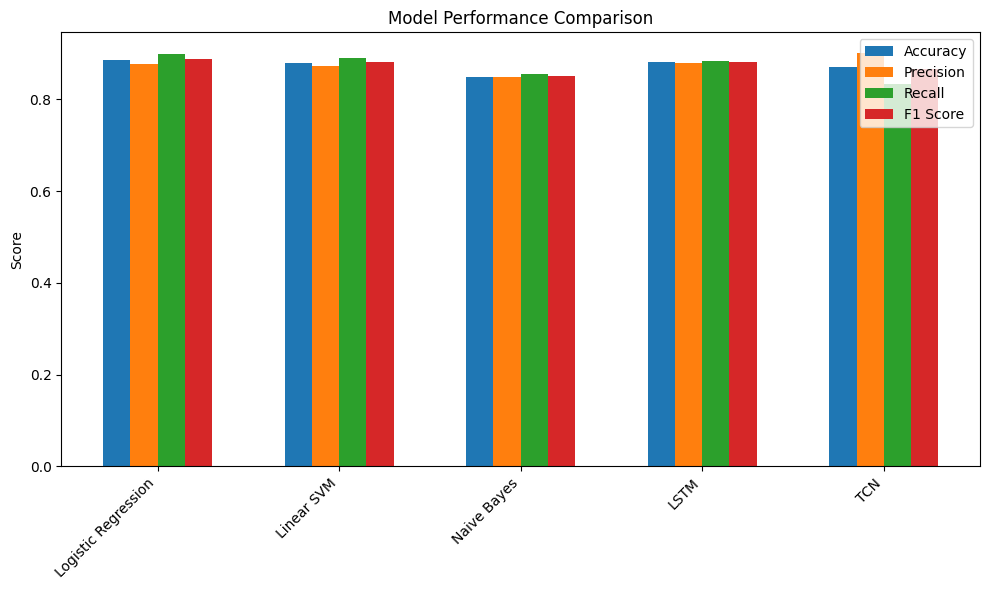

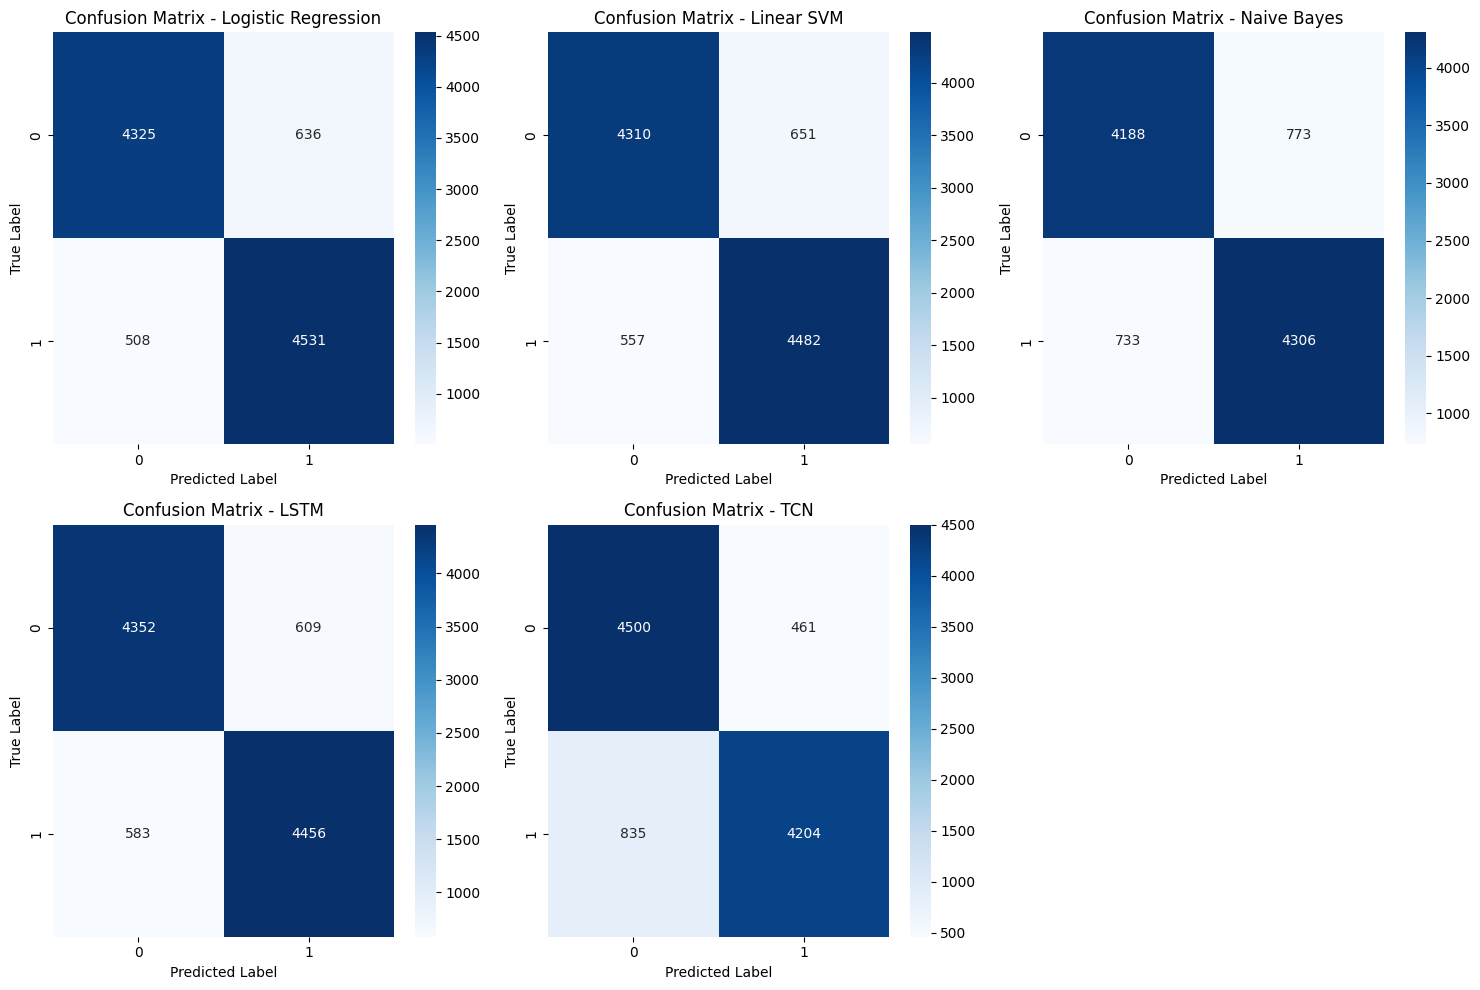

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your provided evaluations
data = {
    "Model": ["Logistic Regression", "Linear SVM", "Naive Bayes", "LSTM", "TCN"],
    "Accuracy": [0.8856, 0.8792, 0.8494, 0.8808, 0.8704],
    "Precision": [0.8769, 0.8732, 0.8478, 0.8798, 0.9012],
    "Recall": [0.8992, 0.8895, 0.8545, 0.8843, 0.8343],
    "F1 Score": [0.8879, 0.8812, 0.8512, 0.8820, 0.8664],
    "Confusion Matrix": [
        [[4325, 636], [508, 4531]],
        [[4310, 651], [557, 4482]],
        [[4188, 773], [733, 4306]],
        [[4352, 609], [583, 4456]],
        [[4500, 461], [835, 4204]],
    ],
}

df = pd.DataFrame(data)

# 1. Table Representation
print("Performance Metrics Table:")
print(df[["Model", "Accuracy", "Precision", "Recall", "F1 Score"]].to_string(index=False))
print("\n")

# 2. Bar Chart for Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
plt.figure(figsize=(10, 6))
width = 0.15  # Width of each bar

x = range(len(df))
for i, metric in enumerate(metrics):
    plt.bar([j + i*width for j in x], df[metric], width, label=metric)

plt.xticks([j + 1.5*width for j in x], df["Model"], rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Heatmaps for Confusion Matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust layout for 5 plots
axes = axes.ravel()  # Flatten the axes array

for i, model in enumerate(df["Model"]):
    cm = df["Confusion Matrix"][i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=[0, 1], yticklabels=[0, 1])
    axes[i].set_title(f"Confusion Matrix - {model}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Remove extra subplot if only 5 models
if len(df["Model"]) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Τα αποτελέσματα δείχνουν:

* Logistic Regression, Linear SVM, LSTM: Πολύ καλή και παρόμοια απόδοση, κατάλληλα για το IMDB.
* Naive Bayes: Αποδεκτή απόδοση, αλλά υστερεί σε σχέση με τα πιο σύνθετα μοντέλα στο συγκεκριμένο dataset.
* TCN: Υψηλό Precision, αλλά χαμηλό Recall, υποδεικνύοντας ότι χάνει αρκετές θετικές κριτικές.

Συνοπτικά, τα Logistic Regression, Linear SVM και LSTM είναι οι καλύτερες επιλογές για το IMDB. Το Naive Bayes δείχνει τη χαμηλότερη απόδοση.

# Cell 14:Pre-Trained model DistilBert(not used because of time constraints)

λόγω χρόνου δεν ήταν δυνατό η χρήση pre-trained model παρόλα αυτά αφήνω το παράδειγμα κωδικά χρησιμοποιώ DistilBert παρουσιάστηκε ότι είχε αρκετά μεγάλο ποσοστό ακρίβειας

παρόλο που χρησιμοποιήθηκαν 2500 μονό δείγματα χρειαζόταν πάνω από ώρα για να ολοκληρωθεί, ενώ δεν μπορούσε να τρέξει όλοι την βάση στις 5 ώρες περίπου κοβότανε

Evaluation:
* Accuracy: 0.806
* Precision: 0.7637540453074434
* Recall: 0.9076923076923077
* F1 Score: 0.8295254833040422
					 precision    recall  f1-score   support

				 0       0.87      0.70      0.77       240

				 1       0.76      0.91      0.83       260

		  accuracy                           0.81       500

		 macro avg       0.82      0.80      0.80       500

	  weighted avg       0.82      0.81      0.80       500
  

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import emoji

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW
from torch.cuda.amp import autocast, GradScaler

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Preprocessing
jargon_abbreviations = {
    "oscar-worthy": "excellent",
    "box office hit": "successful movie",
    "cliffhanger": "abrupt ending",
    "prequel": "previous movie",
    "sequel": "following movie",
    "remake": "new version",
    "indie film": "independent film",
    "cgi": "computer generated imagery",
    "vfx": "visual effects",
    "rotfl": "rolling on the floor laughing",
    "lol": "laughing out loud",
    "imo": "in my opinion",
    "tbh": "to be honest",
}

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = emoji.replace_emoji(text, replace=" ")
    words = [jargon_abbreviations.get(word, word) for word in text.split()]
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['review'] = df['review'].apply(preprocess_text)

# Limit data to 2500 samples
df_limited = df.sample(2500, random_state=42).reset_index(drop=True) # Reset index after sampling
y_limited = df_limited['sentiment'].map({'positive': 1, 'negative': 0})

# Tokenization
batch_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
encoded_data = batch_tokenizer.batch_encode_plus(
    df_limited['review'].tolist(),
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

input_ids, attention_masks = encoded_data['input_ids'], encoded_data['attention_mask']
labels = torch.tensor(y_limited.values)

X_train_ids, X_test_ids, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
X_train_masks, X_test_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2, random_state=42)

batch_size = 32 # Reduced batch size to fit in memory more easily with smaller dataset
train_dataset = TensorDataset(X_train_ids, X_train_masks, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_ids, X_test_masks, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=3e-5)
scaler = GradScaler()
epochs = 3

# Training with Mixed Precision
for epoch in range(epochs):
    model.train()
    for i, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

# Evaluation
model.eval()
y_pred = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, _ = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
        y_pred.extend(predictions.cpu().numpy())

y_true = y_test.cpu().numpy()
print("Evaluation:")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

Using device: cpu


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-45-3af7c6b47a21>:90: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/usr/local/lib/python3.11/dist-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Di

Evaluation:
Accuracy: 0.806
Precision: 0.7637540453074434
Recall: 0.9076923076923077
F1 Score: 0.8295254833040422
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       240
           1       0.76      0.91      0.83       260

    accuracy                           0.81       500
   macro avg       0.82      0.80      0.80       500
weighted avg       0.82      0.81      0.80       500

